In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
#modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings

In [24]:
df = pd.read_csv('raw.csv')


In [25]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
X = df.drop(columns=['math score'],axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [27]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [28]:
print("Catogries in 'gender' variable:",end =" ")
print(df['gender'].unique())

print("Catogries in 'race/ethnicity' variable:",end =" ")
print(df['race/ethnicity'].unique())

print("Catogries in 'test preparation course' variable:",end =" ")
print(df['test preparation course'].unique())

print("Catogries in 'lunch' variable:",end =" ")
print(df['lunch'].unique())

print("Catogries in 'parental level of education ' variable:",end =" ")
print(df['parental level of education'].unique())




Catogries in 'gender' variable: ['female' 'male']
Catogries in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Catogries in 'test preparation course' variable: ['none' 'completed']
Catogries in 'lunch' variable: ['standard' 'free/reduced']
Catogries in 'parental level of education ' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [29]:
y = df['math score']

In [30]:
y.shape

(1000,)

In [31]:
import pandas as pd

# Recreate X from the original DataFrame
X = df.drop("math score", axis=1)  # replace with your actual target column name

# Now you can use select_dtypes
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [32]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)



In [33]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [34]:
X.shape

(1000, 7)

In [35]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 7)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((800, 7), (200, 7))

In [37]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)  # ✅ Don't overwrite r2_score function
    return mae, rmse, r2

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),  # <-- Changed to Regressor
    "Random Forest": RandomForestRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0),
    "AdaBoost Regressor": AdaBoostRegressor()    
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"\n🔍 Model: {model_name}")
    model_list.append(model_name)
    r2_list.append(model_test_r2)

    print("Model performance on Train Set:")
    print("  RMSE: {:.4f}".format(model_train_rmse))
    print("  MAE: {:.4f}".format(model_train_mae))
    print("  R2 Score: {:.4f}".format(model_train_r2))

    print("Model performance on Test Set:")
    print("  RMSE: {:.4f}".format(model_test_rmse))
    print("  MAE: {:.4f}".format(model_test_mae))
    print("  R2 Score: {:.4f}".format(model_test_r2))
    
    print("-" * 50)



🔍 Model: Linear Regression
Model performance on Train Set:
  RMSE: 5.5876
  MAE: 4.4947
  R2 Score: 0.8615
Model performance on Test Set:
  RMSE: 5.3175
  MAE: 4.1301
  R2 Score: 0.8838
--------------------------------------------------

🔍 Model: Lasso
Model performance on Train Set:
  RMSE: 6.5472
  MAE: 5.1733
  R2 Score: 0.8099
Model performance on Test Set:
  RMSE: 6.4453
  MAE: 5.0967
  R2 Score: 0.8293
--------------------------------------------------

🔍 Model: Ridge
Model performance on Train Set:
  RMSE: 5.5879
  MAE: 4.4937
  R2 Score: 0.8615
Model performance on Test Set:
  RMSE: 5.3190
  MAE: 4.1308
  R2 Score: 0.8837
--------------------------------------------------

🔍 Model: K-Neighbors
Model performance on Train Set:
  RMSE: 5.6109
  MAE: 4.4933
  R2 Score: 0.8604
Model performance on Test Set:
  RMSE: 7.3109
  MAE: 5.6830
  R2 Score: 0.7804
--------------------------------------------------

🔍 Model: Decision Tree
Model performance on Train Set:
  RMSE: 0.2795
  MAE: 


🔍 Model: Random Forest
Model performance on Train Set:
  RMSE: 2.2990
  MAE: 1.8348
  R2 Score: 0.9766
Model performance on Test Set:
  RMSE: 6.0272
  MAE: 4.6615
  R2 Score: 0.8507
--------------------------------------------------

🔍 Model: CatBoost Regressor
Model performance on Train Set:
  RMSE: 3.1463
  MAE: 2.4707
  R2 Score: 0.9561
Model performance on Test Set:
  RMSE: 6.0678
  MAE: 4.6540
  R2 Score: 0.8487
--------------------------------------------------

🔍 Model: AdaBoost Regressor
Model performance on Train Set:
  RMSE: 5.9311
  MAE: 4.8211
  R2 Score: 0.8440
Model performance on Test Set:
  RMSE: 6.1054
  MAE: 4.7288
  R2 Score: 0.8468
--------------------------------------------------


In [39]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name',"R2_Score"]).sort_values(by="R2")

KeyError: 'R2'

In [ ]:

results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
results_df = results_df.sort_values(by="R2_Score", ascending=False)

print("\n📊 Model Performance Summary (Sorted by R2 Score):")
pd.DataFrame(results_df)


📊 Model Performance Summary (Sorted by R2 Score):


,Model Name,R2_Score
0,Linear Regression,0.883803
2,Ridge,0.883736
5,Random Forest,0.851598
7,AdaBoost Regressor,0.851335
6,CatBoost Regressor,0.848694
1,Lasso,0.829281
3,K-Neighbors,0.780351
4,Decision Tree,0.728567


In [43]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100

print("Accuracy of Linear Regression Model is %.2f%%" % score)

Accuracy of Linear Regression Model is 88.38%


Text(0, 0.5, 'Predicted')

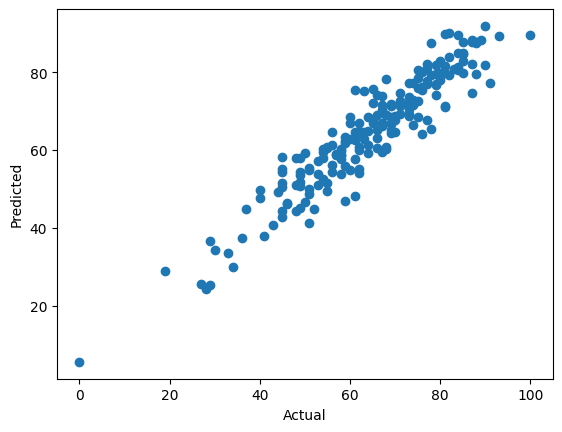

In [44]:
plt.scatter(y_test, y_pred);
plt.xlabel("Actual")
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

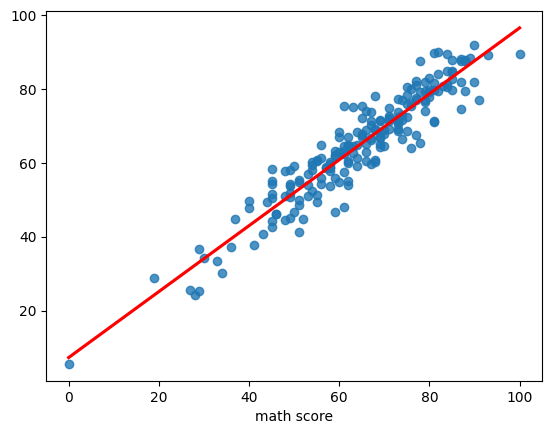

In [45]:
   sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red"})

In [46]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred,'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.118557,13.881443
737,53,57.073580,-4.073580
740,80,79.357668,0.642332
660,74,77.150932,-3.150932
411,84,84.912837,-0.912837
...,...,...,...
408,52,44.903648,7.096352
332,62,59.926534,2.073466
208,74,66.529192,7.470808
613,65,67.953852,-2.953852
